In [3]:
import os
import cv2

In [4]:
features=[]
target=[]
for x in ['dark','puffy_eyes','wrinkles']:
    ImagesNamesList=os.listdir("C:/Users/LENOVO/Desktop/Image_Dataset"+"/"+str(x))
    for y in ImagesNamesList:
        Imagearr=cv2.imread("C:/Users/LENOVO/Desktop/Image_Dataset"+"/"+str(x)+"/"+y)
        try:
            Imagearr=cv2.resize(Imagearr,(100,100))
        except:
            pass
        features.append(Imagearr)
        if(x=='dark'):
            target.append(0)
        elif(x=='puffy_eyes'):
            target.append(1)
        else:
            target.append(2)
    print("In folder",x)

In folder dark
In folder puffy_eyes
In folder wrinkles


In [5]:
import numpy as np

In [6]:
features=np.array(features)

In [7]:
target=np.array(target)

In [8]:
features.shape

(698, 100, 100, 3)

In [9]:
target.shape

(698,)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2)

In [12]:
features_train.shape

(558, 100, 100, 3)

In [13]:
target_train.shape

(558,)

In [14]:
target_test.shape

(140,)

# normalization

In [15]:
def preprocessing(image):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image=image/255
    return image

In [16]:
features_train=np.array(list(map(preprocessing,features_train)))

In [17]:
features_train.shape

(558, 100, 100)

# reshape

In [18]:
features_train=features_train.reshape(558,100,100,1)

# image agumentation

In [19]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [20]:
dataGen=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1)

In [21]:
dataGen.fit(features_train)

In [22]:
batches=dataGen.flow(features_train,target_train,batch_size=20)

In [23]:
len(batches)

28

In [24]:
images,labels=next(batches)

In [25]:
images.shape

(20, 100, 100, 1)

In [26]:
import matplotlib.pyplot as plt

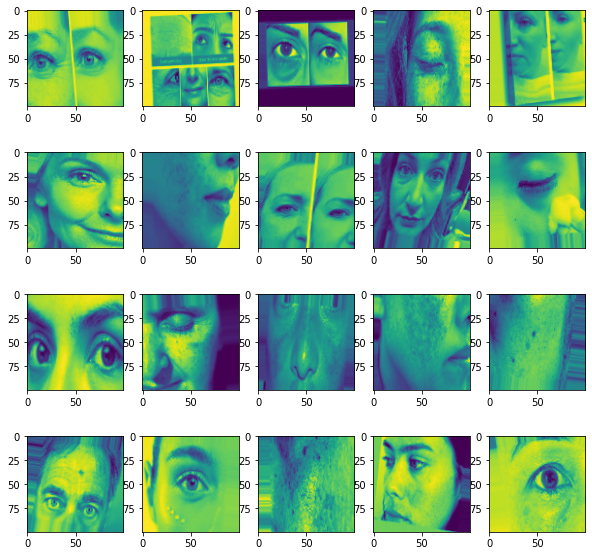

In [27]:
plt.figure(figsize=(10,10))
for i in range(0,20):
    plt.subplot(4,5,i+1)
    plt.imshow(images[i].reshape(100,100))
plt.show()
    

# conversion to classification

In [28]:
from keras.utils import to_categorical

In [29]:
target_train=to_categorical(target_train)

In [30]:
target_train.shape

(558, 3)

In [31]:
features_train.shape

(558, 100, 100, 1)

# architecture mentioning

In [32]:
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout

In [33]:
from keras.models import Sequential
model=Sequential()

In [34]:
model.add(Conv2D(60,(3,3),activation="relu",input_shape=(100,100,1)))
model.add(Conv2D(60,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(60,(3,3),activation="relu"))
model.add(Conv2D(60,(3,3),activation="relu"))
model.add(Conv2D(60,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(150,activation="relu"))
model.add(Dense(3,activation="softmax"))

In [35]:
from keras.optimizers import Adam

In [36]:
model.compile(Adam(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

# step 3

In [37]:
model.fit_generator(dataGen.flow(features_train,target_train,batch_size=20),epochs=20)

Epoch 1/20
28/28 [==============================] - 41s 1s/step - loss: 1.1109 - accuracy: 0.3244
Epoch 2/20
28/28 [==============================] - 40s 1s/step - loss: 1.0987 - accuracy: 0.3799
Epoch 3/20
28/28 [==============================] - 39s 1s/step - loss: 1.0792 - accuracy: 0.4391
Epoch 4/20
28/28 [==============================] - 39s 1s/step - loss: 1.0357 - accuracy: 0.5054
Epoch 5/20
28/28 [==============================] - 39s 1s/step - loss: 1.0029 - accuracy: 0.5072
Epoch 6/20
28/28 [==============================] - 40s 1s/step - loss: 0.8806 - accuracy: 0.6201
Epoch 7/20
28/28 [==============================] - 39s 1s/step - loss: 0.8509 - accuracy: 0.6022
Epoch 8/20
28/28 [==============================] - 35s 1s/step - loss: 0.8564 - accuracy: 0.6308
Epoch 9/20
28/28 [==============================] - 35s 1s/step - loss: 0.7890 - accuracy: 0.6380
Epoch 10/20
28/28 [==============================] - 35s 1s/step - loss: 0.7825 - accuracy: 0.6505
Epoch 11/20
28/28 [

In [38]:
 from keras.models import model_from_json

In [39]:
model_json = model.to_json()

In [40]:
with open("verzeoAgeingSigns.json","w") as ab:
 ab.write(model_json)
 ab.close()
model.save_weights("verzeoAgeing.h5")

In [ ]:
json_file = open("verzeoAgeingSigns.json","r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("verzeoAgeing.h5")
#Loaded model successfully
predictions = loaded_model.predict(features_train)

In [ ]:
len(predictions)

In [ ]:
def getClassName(classNo):
 if classNo==0: return 'dark'
 elif classNo==1: return 'puffy_signs'
 elif classNo==2: return 'wrinkles'

In [ ]:
capt = cv2.VideoCapture(0)
capt.set(3,640)
capt.set(4,480)
capt.set(10,180)

In [ ]:
while True:
    message,image = capt.read()
    imagearr = np.asarray(image)
    imagearr = cv2.resize(imagearr,(100,100))
    imagearr = preprocessing(imagearr)
    imagearr = imagearr.reshape(1,100,100,1)
    predictions = loaded_model.predict(imagearr)
    classIndex = loaded_model.predict_classes(imagearr)
    cv2.putText(image,"Class: ",(20,35),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
    cv2.putText(image,"Probability: ",(20,75),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
    probabilityValue = np.amax(predictions)
    if probabilityValue>0.75:
        cv2.putText(image,getClassName(classIndex),(120,35),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
        cv2.putText(image,str(probabilityValue*100)+"%",(200,75),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
    cv2.imshow("Model Prediction",image)
    cv2.waitKey(1)